In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_df=pd.read_csv("data.csv")

c:\users\harsh\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_df.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [4]:
data_df.drop(['time_period','time_period_type'],axis=1,inplace=True)

In [5]:
data_df.columns

Index(['report_date', 'location', 'location_type', 'data_field',
       'data_field_code', 'value', 'unit'],
      dtype='object')

# show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [6]:
data_df.query("location=='Argentina-Catamarca' & data_field_code=='AR0005'")[['location','value']]

,location,value
16,Argentina-Catamarca,14
160,Argentina-Catamarca,15
304,Argentina-Catamarca,15
448,Argentina-Catamarca,15
592,Argentina-Catamarca,15
736,Argentina-Catamarca,15
880,Argentina-Catamarca,16
1024,Argentina-Catamarca,15
1168,Argentina-Catamarca,16
1312,Argentina-Catamarca,15


# Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.

In [7]:
ld=data_df.query("unit=='cases' & location=='Argentina-CABA'").groupby('report_date')

In [8]:
df=data_df.query("unit=='cases' & location=='Argentina-CABA'").groupby('report_date').groups


In [9]:
df

{'2016-03-19': Int64Index([6, 7, 8, 9, 10, 11], dtype='int64'),
 '2016-03-26': Int64Index([150, 151, 152, 153, 154, 155], dtype='int64'),
 '2016-04-02': Int64Index([294, 295, 296, 297, 298, 299], dtype='int64'),
 '2016-04-09': Int64Index([438, 439, 440, 441, 442, 443], dtype='int64'),
 '2016-04-16': Int64Index([582, 583, 584, 585, 586, 587], dtype='int64'),
 '2016-04-29': Int64Index([726, 727, 728, 729, 730, 731], dtype='int64'),
 '2016-05-07': Int64Index([870, 871, 872, 873, 874, 875], dtype='int64'),
 '2016-05-14': Int64Index([1014, 1015, 1016, 1017, 1018, 1019], dtype='int64'),
 '2016-05-22': Int64Index([1158, 1159, 1160, 1161, 1162, 1163], dtype='int64'),
 '2016-05-30': Int64Index([1302, 1303, 1304, 1305, 1306, 1307], dtype='int64'),
 '2016-06-06': Int64Index([1446, 1447, 1448, 1449, 1450, 1451], dtype='int64'),
 '2016-06-13': Int64Index([1590, 1591, 1592, 1593, 1594, 1595], dtype='int64'),
 '2016-06-18': Int64Index([1734, 1735, 1736, 1737, 1738, 1739], dtype='int64'),
 '2016-06-26

In [10]:
d_caba=dict()
for i in df:
    sum=0
    lst=list(df[i])
    for j in lst:
        sum+=(int)(data_df.loc[j]['value'])
    d_caba[i]=sum

In [11]:
df=data_df.query("unit=='cases' & location=='Argentina-Catamarca'").groupby('report_date').groups

In [12]:
d_cata=dict()
for i in df:
    sum=0
    lst=list(df[i])
    for j in lst:
        sum+=(int)(data_df.loc[j]['value'])
    d_cata[i]=sum

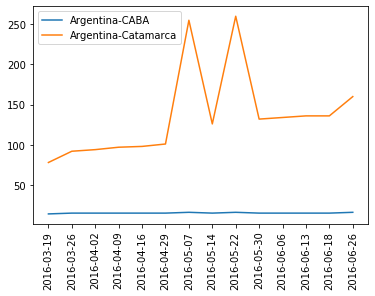

In [13]:
plt.plot(list(d_cata.keys()),list(d_cata.values()),label="Argentina-CABA")
plt.plot(list(d_caba.keys()),list(d_caba.values()),label="Argentina-Catamarca")
plt.xticks(rotation=90)
plt.legend()

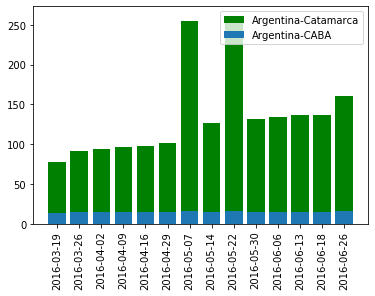

In [14]:
plt.bar(list(d_caba.keys()),list(d_caba.values()),label="Argentina-Catamarca",color='g')
plt.bar(list(d_cata.keys()),list(d_cata.values()),label="Argentina-CABA")

plt.xticks(rotation=90)
plt.legend()

# Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'


In [15]:
data_df=pd.read_csv("data.csv")

In [16]:
data_df.drop(['time_period','time_period_type'],axis=1,inplace=True)

In [17]:
ar1=data_df.query("data_field=='cumulative_confirmed_local_cases'")
ar2=data_df.query("data_field=='cumulative_probable_local_cases'")
ar3=data_df.query("data_field=='cumulative_confirmed_imported_cases'")
ar4=data_df.query("data_field=='cumulative_probable_imported_cases'")
ar5=data_df.query("data_field=='cumulative_cases_under_study'")
ar6=data_df.query("data_field=='cumulative_cases_discarded'")

In [18]:
ar1.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
6,2016-03-19,Argentina-CABA,province,cumulative_confirmed_local_cases,AR0001,0,cases
12,2016-03-19,Argentina-Catamarca,province,cumulative_confirmed_local_cases,AR0001,0,cases
18,2016-03-19,Argentina-Chaco,province,cumulative_confirmed_local_cases,AR0001,0,cases
24,2016-03-19,Argentina-Chubut,province,cumulative_confirmed_local_cases,AR0001,0,cases


In [19]:
x=list(ar1['report_date'].unique())

In [20]:
buen=ar1.query("location=='Argentina-Buenos_Aires'")['value'].apply(pd.to_numeric)
caba=ar1.query("location=='Argentina-CABA'")['value'].apply(pd.to_numeric)
cata=ar1.query("location=='Argentina-Catamarca'")['value'].apply(pd.to_numeric)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

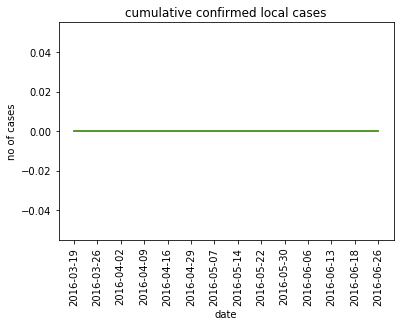

In [21]:
plt.plot(x,buen)
plt.plot(x,caba)
plt.plot(x,cata)
plt.xlabel("date")
plt.ylabel("no of cases")
plt.title("cumulative confirmed local cases")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

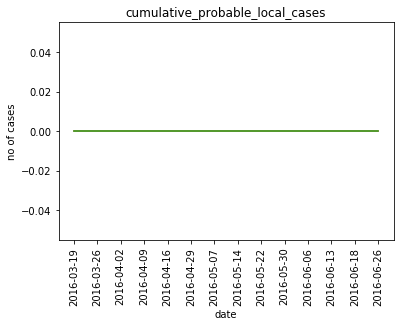

In [22]:
buen=ar2.query("location=='Argentina-Buenos_Aires'")['value'].apply(pd.to_numeric)
caba=ar2.query("location=='Argentina-CABA'")['value'].apply(pd.to_numeric)
cata=ar2.query("location=='Argentina-Catamarca'")['value'].apply(pd.to_numeric)
plt.plot(x,buen)
plt.plot(x,caba)
plt.plot(x,cata)
plt.xlabel("date")
plt.ylabel("no of cases")
plt.title("cumulative_probable_local_cases")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

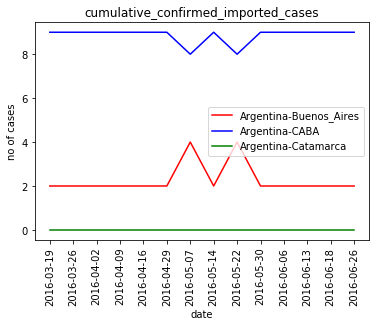

In [23]:
buen=ar3.query("location=='Argentina-Buenos_Aires'")['value'].apply(pd.to_numeric)
caba=ar3.query("location=='Argentina-CABA'")['value'].apply(pd.to_numeric)
cata=ar3.query("location=='Argentina-Catamarca'")['value'].apply(pd.to_numeric)
plt.plot(x,buen,color='r',label="Argentina-Buenos_Aires")
plt.plot(x,caba,color='b',label="Argentina-CABA")
plt.plot(x,cata,color='g',label="Argentina-Catamarca")
plt.xlabel("date")
plt.ylabel("no of cases")
plt.title("cumulative_confirmed_imported_cases")
plt.legend()
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

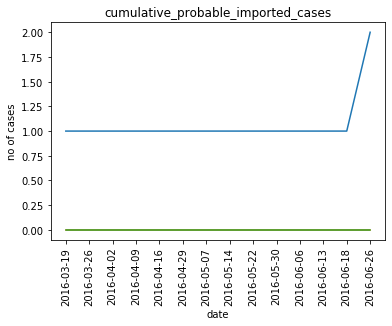

In [24]:
buen=ar4.query("location=='Argentina-Buenos_Aires'")['value'].apply(pd.to_numeric)
caba=ar4.query("location=='Argentina-CABA'")['value'].apply(pd.to_numeric)
cata=ar4.query("location=='Argentina-Catamarca'")['value'].apply(pd.to_numeric)
plt.plot(x,buen)
plt.plot(x,caba)
plt.plot(x,cata)
plt.xlabel("date")
plt.ylabel("no of cases")
plt.title("cumulative_probable_imported_cases")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

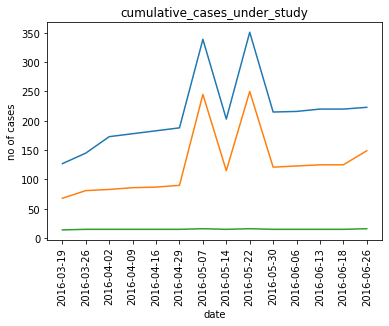

In [25]:
buen=ar5.query("location=='Argentina-Buenos_Aires'")['value'].apply(pd.to_numeric)
caba=ar5.query("location=='Argentina-CABA'")['value'].apply(pd.to_numeric)
cata=ar5.query("location=='Argentina-Catamarca'")['value'].apply(pd.to_numeric)
plt.plot(x,buen)
plt.plot(x,caba)
plt.plot(x,cata)
plt.xlabel("date")
plt.ylabel("no of cases")
plt.title("cumulative_cases_under_study")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

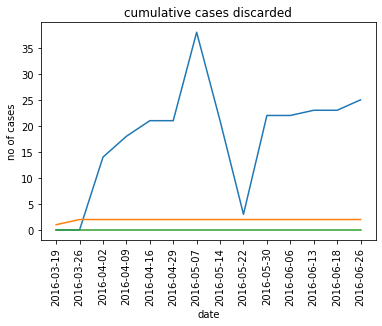

In [26]:
buen=ar6.query("location=='Argentina-Buenos_Aires'")['value'].apply(pd.to_numeric)
caba=ar6.query("location=='Argentina-CABA'")['value'].apply(pd.to_numeric)
cata=ar6.query("location=='Argentina-Catamarca'")['value'].apply(pd.to_numeric)
plt.plot(x,buen)
plt.plot(x,caba)
plt.plot(x,cata)
plt.xlabel("date")
plt.ylabel("no of cases")
plt.title("cumulative cases discarded")
plt.xticks(rotation=90)

# Build a program to predict the correct word for wrongly typed word. for example whst => what, numbr =>number, good => good

In [19]:
from spellchecker import SpellChecker

In [20]:
sp = SpellChecker()
sp.word_frequency.load_text_file('big.txt')

In [48]:
sp.correction('firq')

'fire'

In [49]:
sp.candidates('firq')

{'fir', 'fire', 'firm', 'firs'}

In [58]:
lst=['my','tebt','was','on','firq']

In [59]:
sp.known(lst)

{'my', 'on', 'was'}

In [60]:
sp.unknown(lst)

{'firq', 'tebt'}

In [61]:
sp.word_probability('wst') # probability for wrong word

0.0

In [62]:
sp.word_probability('day') # probability for correct word

0.0006454832643751769

In [74]:
for word in lst:
    if sp.word_probability(word)==0:
        possible=sp.candidates(word)
        print(sp.correction(word),end=' {')
        for p in possible:
            print(p,end=', ')
        print(end='...}')
        print()
    else:
        print(word)

my
test {text, tebb, tbt, tet, debt, test, tent, teat, ...}
was
on
fire {firm, fir, fire, firs, ...}
